# Описание проекта




Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# 1) импорт библиотеки pandas для анализа
import pandas as pd
# 2) импорт библиотеки numpy для математических операций
import numpy as np
# 3) импорт библиотеки seaborn для визуализации
import seaborn as sbn 
# 4) импорт библиотеки matplotlib для так же для визуализации
import matplotlib.pyplot as plt
# 5) импорт библиотеки stats для проверки гипотез
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
#и несколько предустановок по-умолчанию для комфортного использования
pd.set_option('display.max_columns', None)
sbn.set(rc={'figure.figsize':(12,8)})
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#ознакамлюваюсь со структурой данных
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# у нас 16 715 строк и 11 колонок
data.shape

(16715, 11)

In [6]:
#3 последние колонки проблемные, получается у нас в половине датасета пропуски. Изучим подробнее в следующих шагах.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Шаг 2. Подготовьте данные

**2.1 Привожу название столбцов к нижнему регистру**

In [7]:
data.columns = data.columns.str.lower()

**2.2 Преобразую данные в нужные типы**

In [8]:
# на данном этапе преобразовываю Year_of_Release в числовой формат, чтобы убрать нули 
data['year_of_release'] = data['year_of_release'].astype('Int64')
#Чуть позднее сконвертирую оценки пользователей

 **2.3 Обработка пропусков**

In [9]:
#Посмтотрим на их количество
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
#Посмотрим на ценность оставшихся данных в пропусках в колонке name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#уверенность для удаления только выросла, эти данные бесполезны, т.к. из не идентифицировать, поэтому удаляю
data.dropna(subset=['name'], inplace=True)

In [12]:
#оцениваем масштаб бедствия в колонке year_of_release
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


пропуски в колонке year_of_release составляют 1,6% от всего датасета, а учитывая весомость этих данных для дальнейшего анализа, 
прихожу к твердому решению удалить эти данные. Хотя, при большом желании можно привязаться к имени, в котором указан год релиза
считаю, что не окажет никакого влияния на общие данные.
В добавок к этому решению так же влияет факт пропуксках еще 3 колонках

In [13]:
#удаляем пропуски
data.dropna(subset=['year_of_release'], inplace=True)

In [14]:
#посмотрю что представляют собой остальные 3 колоник, в которых очень много пропусков
data.critic_score.sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [15]:
#обращая внимание на то, что количество пропусков user_score и rating очень похожи и, возможно, взаимосвязаны
data.rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [16]:
#посмотрим на user_score
data.user_score.sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [17]:
#погулгли, что значит tbd -to Be Determined, т.е. по сути оценки нет, но она обещает появиться в будущем
#раз нет фактических данных, значит надо удалить эти строки, но перед этим проверить сколько их
data.loc[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


In [18]:
#получилось 2376 записей, что составляет 14% датасета, это много, поэтому просто переименую их в NaN, 
#т.к. смысл данных не поменяется
data.user_score = data.user_score.replace('tbd', np.NaN, regex=True)
#и заодно сконвертирую в форма float
data['user_score'] = data['user_score'].astype('float64')


In [19]:
#посмотрю на датасет состоящий из пропусках в 3 колонках
data_isna = data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]
data_isna.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


<AxesSubplot:xlabel='year_of_release'>

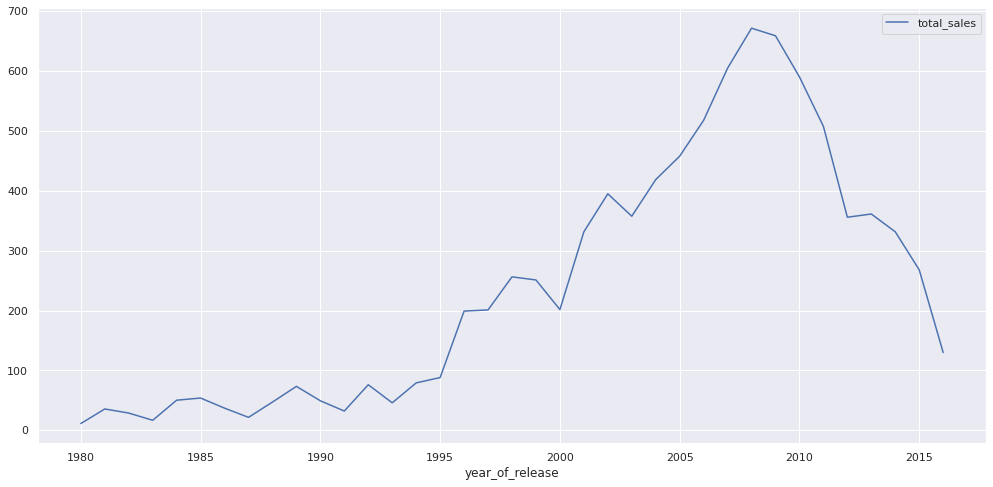

In [20]:
# Добавляю еще 1 колонку по названиемем суммарные продажи во всех регионах и для наглядности строю график.
data['total_sales']= data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(grid=True,figsize=(17, 8))

Каких-то очевидных закономерностей не вижу. Года разные, платформы, имена и т.д. По сути мы просто не можем определить рейтинг, а такие вещи как года выпусков и доходы остается. Пока оставля эти данные в основном датасете. 

На этом предобратботку считаю законченной и продолжу анализом данных.

In [21]:
#поищем явные дубликаты у которых совпадает название и платформа
data[data.duplicated(['name', 'platform'])]
#находим 3 дубликата, изучаем вниметельнее

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.00,8.50,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.00,8.50,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E,0.01


In [22]:
data.query('name == "Need for Speed: Most Wanted" and platform == "X360"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.00,8.50,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.00,8.50,T,1.25


In [23]:
data.query('name == "Need for Speed: Most Wanted" and platform == "PC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.00,8.50,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.00,8.50,T,0.08


In [24]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E,0.01


Если NFS я просто погуглю их реальный выход и удалю некоректную строку, то с последней игрой будет сложнее, т.к. разняца продажи. Навожу справки, что это игра про американский футбол и будет странно, если в Северной америке не будет по ней продаж.
Поэтой принимаю решение удаляить строки 1190, 11715 и 16230

In [25]:
#удаляю вышеперечисленные индексы
data = data.drop(index=[ 1190 , 11715 , 16230 ])

In [26]:
#для поиска неявных дубликатов нужно привести значения в строковый формат. Делаю это в основном датасете, т.к. это ничему
#не повредит
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()

#считаем количество дубликатов
print(data.duplicated(subset=['name','platform']).value_counts())
#заодно делаем проверку
print(data.shape)

False    16441
dtype: int64
(16441, 12)


# **Шаг 3. Проведите исследовательский анализ данных**

**3.1 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

<AxesSubplot:>

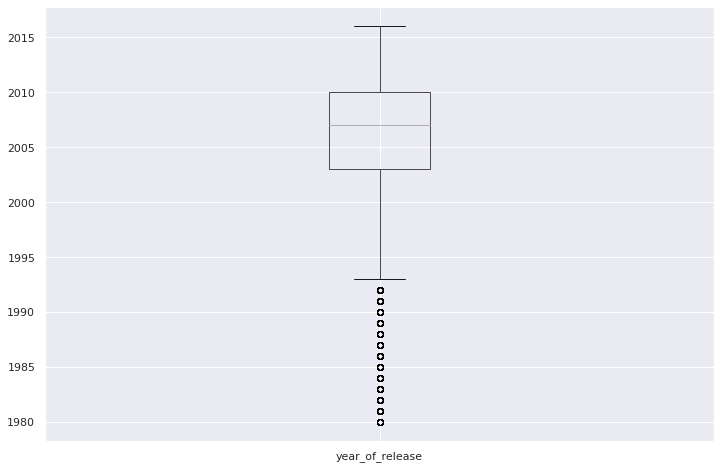

In [27]:
data.boxplot(column='year_of_release')

In [28]:
#на основанииящика с усами делаю вывод, что данные до 1994 года можно смело удалять, т.к данных за это период крайне мало и их,
#по сути, можно считать за выбросы
data = data.loc[data['year_of_release']>=1994]

<AxesSubplot:title={'center':'Количество игр, выходивших в год'}, xlabel='Год', ylabel='Количество'>

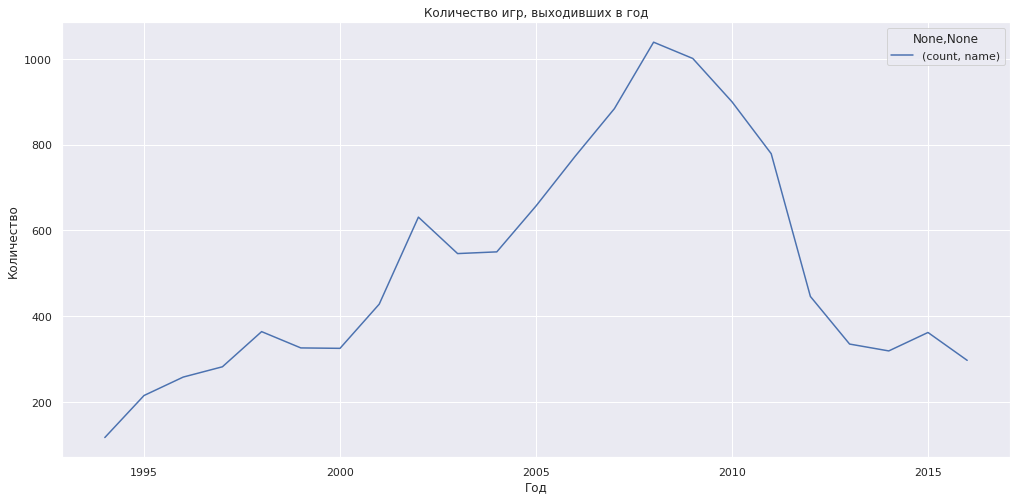

In [29]:
#по обновленным данным посмотрю какое количество игр вообще выходило в год.
#создаю отдельную переменную для посдчета количества игр
data_game_counts = data.drop_duplicates(subset=['name','year_of_release'])
data_game_counts.shape

data_game_counts.pivot_table(index =('year_of_release'), values='name', aggfunc=['count']).plot(grid=True,figsize=(17, 8),
title = 'Количество игр, выходивших в год',xlabel = 'Год',ylabel='Количество' )


<AxesSubplot:title={'center':'Выручка от игр по годам'}, xlabel='Год', ylabel='Сумма продаж'>

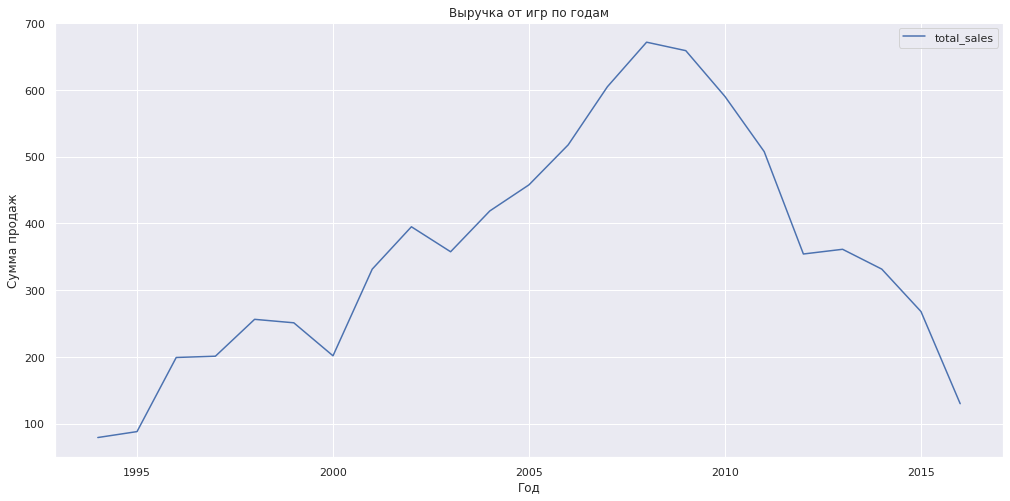

In [30]:
#построю еще 1 график с выручкой по годам
data.pivot_table(index ='year_of_release', values='total_sales', aggfunc='sum').plot(grid=True,figsize=(17, 8),
title = 'Выручка от игр по годам',xlabel = 'Год',ylabel='Сумма продаж' )

Вижу прямую зависимость дохода от продажк от количетсва выпущенных игр

## 3.2 Посмотрим, как менялись продажи по платформам

<AxesSubplot:title={'center':'Суммарный доход в зависимости от платформы'}, xlabel='Платформа', ylabel='Велечина дохода'>

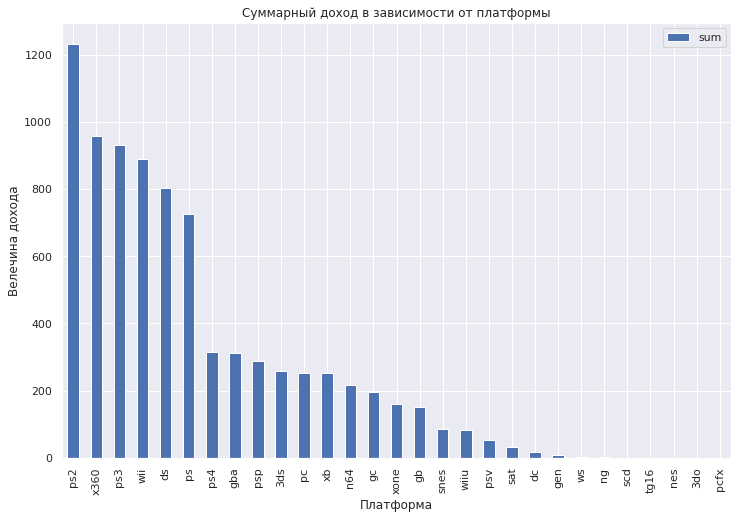

In [31]:
#Выберу платформы с наибольшими суммарными продажами и постройте распределение по годам. 
data_total_sales = data.pivot_table(index ='platform', values='total_sales', aggfunc=['sum'])
data_total_sales.columns = ['sum'] 
data_total_sales.sort_values('sum', ascending = False).plot(kind='bar',
title = 'Суммарный доход в зависимости от платформы',xlabel = 'Платформа',ylabel='Велечина дохода' ) 


In [32]:
#выбираю TOP5 платформ PS2,X360,PS3	,Wii,DS
#data_top5 = data.query('platform == "PS2" | platform == "X360" | platform == "PS3" | platform == "Wii" | platform == "DS"')
top5 = data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum').sort_values('total_sales',
ascending=False).index[:5].tolist()

data_top5 = data.query('platform in @top5')
data_top5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,new super mario bros.,ds,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,wii play,wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,ds,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,plushees,ds,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,score international baja 1000: the official game,ps2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


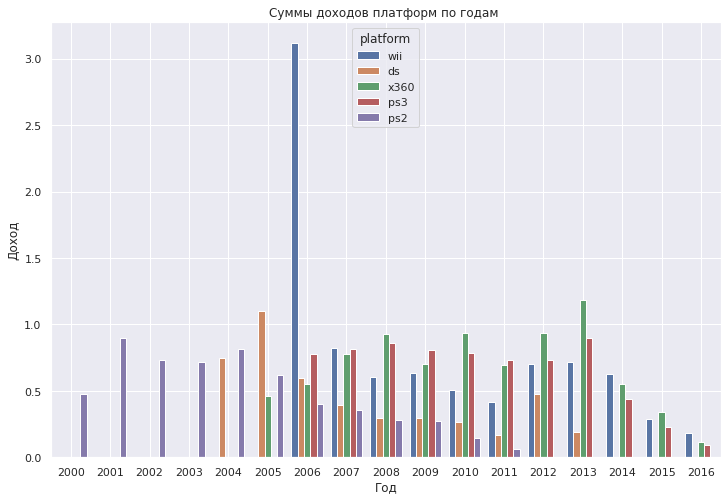

In [33]:
#строю график 
sbn.barplot(data=data_top5, x="year_of_release", y='total_sales', hue="platform", ci= None)
plt.title('Суммы доходов платформ по годам ')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.grid(True)
plt.show();

Если судить по этому срезу данных,то можно увидеть закономерность, что жизнь платформы в среднем 10 с лишним лет
. Так же в глаза бросаются показатели Wii многократнообгонящие остальные платформы за 16 лет,
ну а так же нельзя незаметить, что рынок ближе к 2014 года начал свой спад. Скорее всего причиной 
стали более производительные телефоны, и чтобы поиграть человеку не нужна дорогостоющая приставка или ПК. В добавок
широкое распротранение получили on-line игры для 'простых' компьютеров. 

## 3.3 На основании полученных данным, попробуем, построить прогноз на 2017 год.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1994'),
  Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016')])

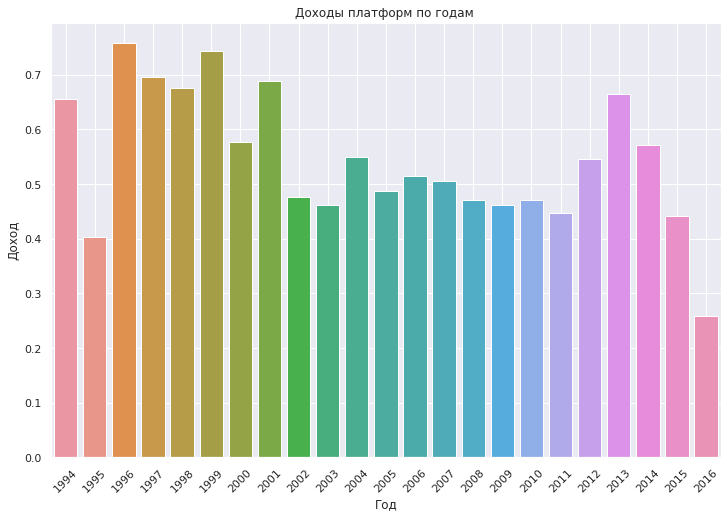

In [34]:
#для этого построю грфик аналогичный предъидущему, чтобы учесть все платформы и посмотрю на тенденции
sbn.barplot(data=data, x="year_of_release", y='total_sales', ci= None)
plt.title('Доходы платформ по годам ')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.grid(True)
plt.xticks(rotation=45)

Как по мне, я вижу тренд падения начиная с 2013. Показатели 2013-2014 очень похожи на 2014-2015. Поэтому в построении прогноза на 2017 год, буду учитывать 4 года. Перед этим, для интереса, проверю полноту данных за этот период

In [35]:
#для начала создам переменную
data_2013_2016 = data[data['year_of_release']>= 2013]
#data_2013_2016 = data.query('year_of_release >= 2013')
data_2013_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


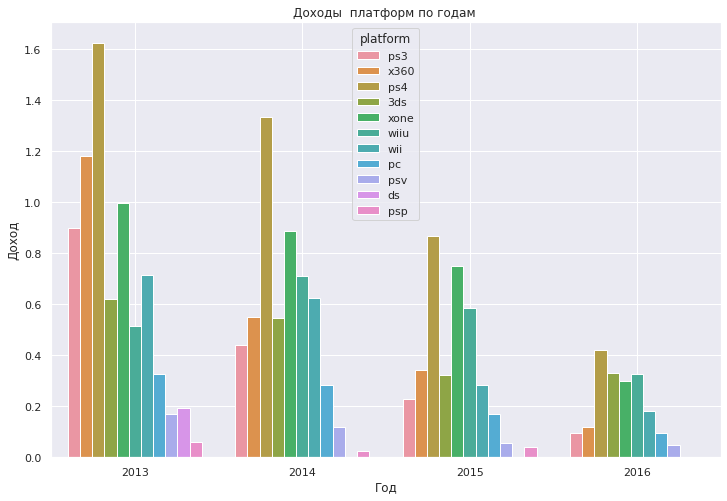

In [36]:
#то, что продажи падают в целом это понятно из прошлых ячеек.
#изучим остальные дынные среза
sbn.barplot(data=data_2013_2016, x='year_of_release' , y='total_sales', hue="platform", ci= None)
plt.title('Доходы  платформ по годам ')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.grid(True)

In [37]:
#выделим топ-5 лидеров
data_top_2013_2016 = data_2013_2016.pivot_table(index ='platform', values='total_sales', aggfunc='sum').sort_values('total_sales',
ascending=False).index[:5].tolist()
data_top_2013_2016

['ps4', 'ps3', 'xone', '3ds', 'x360']

In [38]:
#отфильтруем датасет с 2013 года по топ-5 платформам
data_top5_2013_2016 = data_2013_2016.query('platform in @data_top_2013_2016')
data_top5_2013_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,metal gear solid v: the definitive experience,xone,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,tsukigime ranko's longest day,ps3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16677,aikatsu stars! my special appeal,3ds,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,dynasty warriors: eiketsuden,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


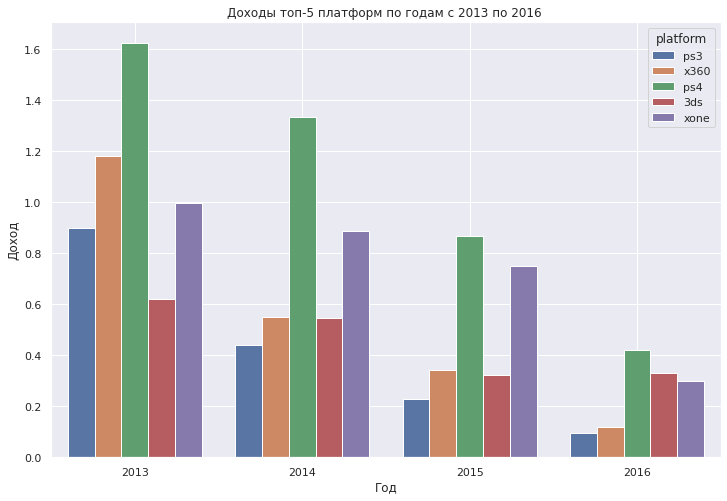

In [39]:
#1473 колонки за 4 года... не густо
sbn.barplot(data=data_top5_2013_2016, x='year_of_release' , y='total_sales', hue="platform", ci= None)
plt.title('Доходы топ-5 платформ по годам с 2013 по 2016 ')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.grid(True)

Из это таблицы напрашивается вывод, что PS3 и X360 уже можно списывать со счетов. Остальные еще 'поживут'

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

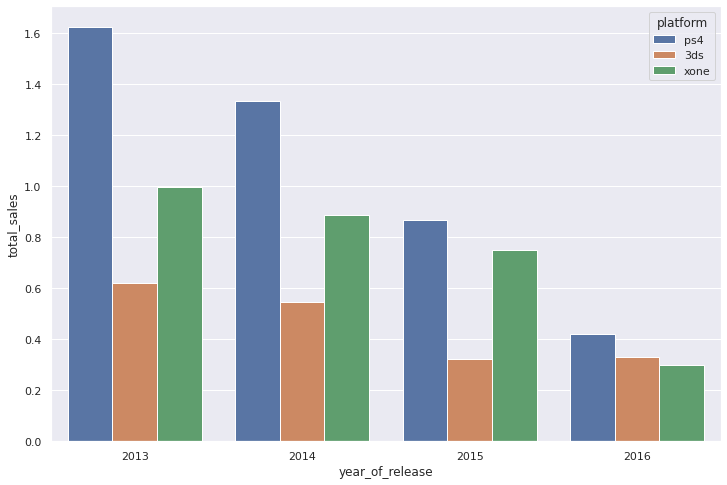

In [40]:
#не знаю на сколько это правильно, но я выбираю 3DS как кандидата, у которого есть будущее. 
#у этой платформы высока стабильность, если сравнивать с остальными платформами
#поэтому использую ручной метод фильтрации, а не через список
data_top3_2013_2016 = data_2013_2016.query('platform == "ps4" | platform == "xone" | platform == "3ds"')
sbn.barplot(data=data_top3_2013_2016, x='year_of_release' , y='total_sales', hue="platform", ci= None)

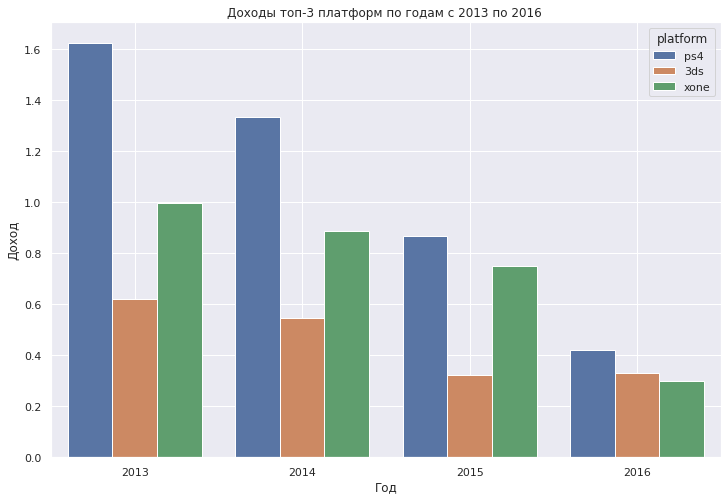

In [41]:
#визуализируем топ-3
sbn.barplot(data=data_top3_2013_2016, x='year_of_release' , y='total_sales', hue="platform", ci= None)
plt.title('Доходы топ-3 платформ по годам с 2013 по 2016 ')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.grid(True)

In [42]:
data_top3_2013_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,mushi bugyou,3ds,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16660,prison architect,xone,2016,Action,0.01,0.00,0.00,0.00,74.00,6.70,NaN,0.01
16668,fujiko f. fujio characters: great assembly! sl...,3ds,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16672,metal gear solid v: the definitive experience,xone,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


(array([0, 1, 2, 3]),
 [Text(0, 0, '(2013, ps4)'),
  Text(1, 0, '(2014, ps4)'),
  Text(2, 0, '(2015, ps4)'),
  Text(3, 0, '(2016, ps4)')])

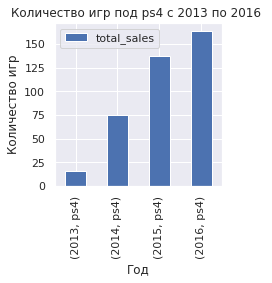

In [43]:
#возможно спад связан с меньшим количеством выхода игр?
(
data_top3_2013_2016.query('platform == "ps4"').
pivot_table(index=('year_of_release', 'platform'), values='total_sales', aggfunc='count').
plot(kind='bar',figsize=(3,3))
)
plt.title('Количество игр под ps4 с 2013 по 2016 ')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(2013, xone)'),
  Text(1, 0, '(2014, xone)'),
  Text(2, 0, '(2015, xone)'),
  Text(3, 0, '(2016, xone)')])

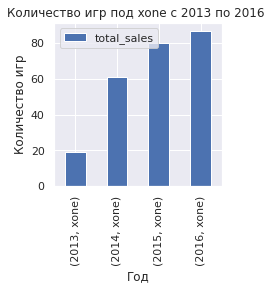

In [44]:
(
data_top3_2013_2016.query('platform == "xone"').
pivot_table(index=('year_of_release', 'platform'), values='total_sales', aggfunc='count').
plot(kind='bar',figsize=(3,3))
)
plt.title('Количество игр под xone с 2013 по 2016 ')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '(2013, 3ds)'),
  Text(1, 0, '(2014, 3ds)'),
  Text(2, 0, '(2015, 3ds)'),
  Text(3, 0, '(2016, 3ds)')])

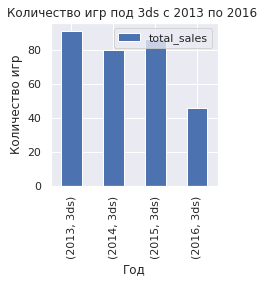

In [45]:
(
data_top3_2013_2016.query('platform == "3ds"').
pivot_table(index=('year_of_release', 'platform'), values='total_sales', aggfunc='count').
plot(kind='bar',figsize=(3,3))
)
plt.title('Количество игр под 3ds с 2013 по 2016 ')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(True)
plt.xticks(rotation=90)

**Выводы:** Не смотря на рост выхода игр, доходы продолжают стремительно падать. Тут выделяеты 3DS, он более стабилен что в падении продаж, что в выпуске игр за исключением последнего года. Поэтому в 2017 году я делаю ставки на существование этих 3-х китов и продолжение падание в продажах.

## 3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 


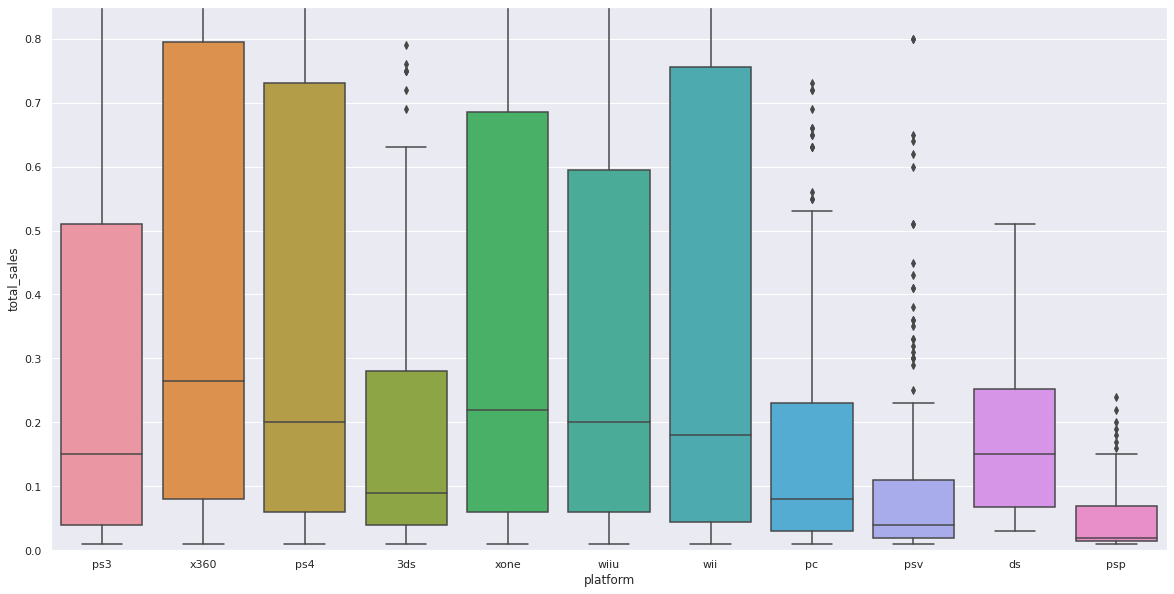

In [46]:
sbn.set(rc={'figure.figsize':(20,10)})
sbn.boxplot(data=data_2013_2016, x = 'platform', y ='total_sales')
plt.ylim(0, 0.85)
plt.show()

Тут прослеживается тренд присущий любой платформе. Есть бумы продаж которые выходят очень далеко за пределы 3-его квартиля. И такая ситуация практически везде. 

## 3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [47]:
#для анализа возьму данные из data_top3_2013_2016, но сначала проверю количество пропусков, 
#возможно их меньше чем в изначальном датасете
data_top3_2013_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 31 to 16677
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             942 non-null    object 
 1   platform         942 non-null    object 
 2   year_of_release  942 non-null    Int64  
 3   genre            942 non-null    object 
 4   na_sales         942 non-null    float64
 5   eu_sales         942 non-null    float64
 6   jp_sales         942 non-null    float64
 7   other_sales      942 non-null    float64
 8   critic_score     492 non-null    float64
 9   user_score       519 non-null    float64
 10  rating           545 non-null    object 
 11  total_sales      942 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 128.9+ KB


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.3881509469324385
AxesSubplot(0.125,0.125;0.775x0.755)
-0.026513383301050384


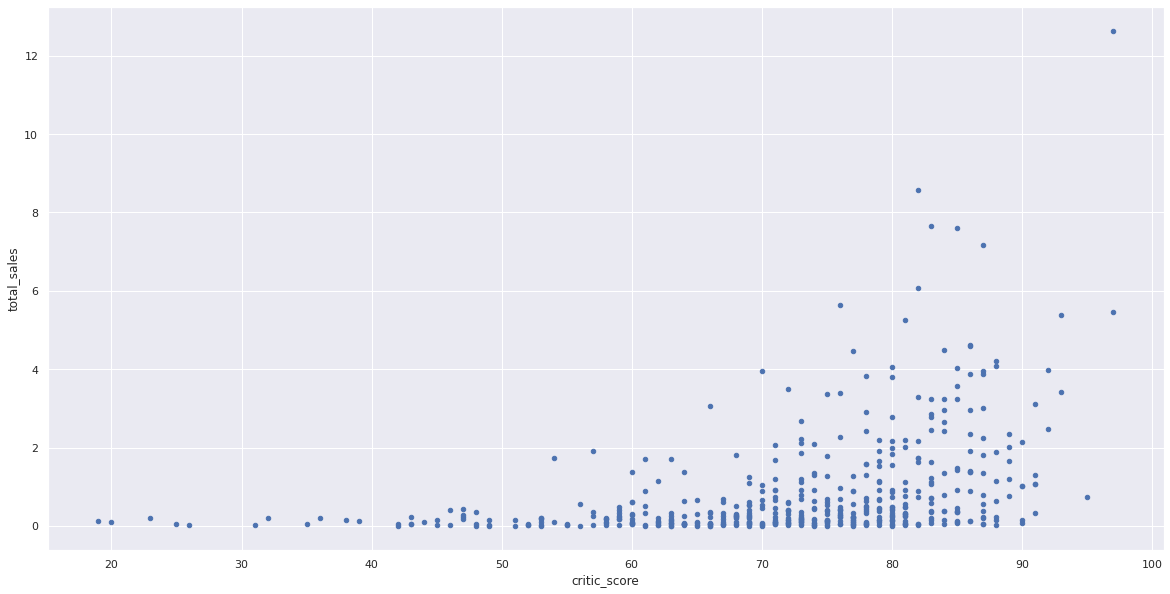

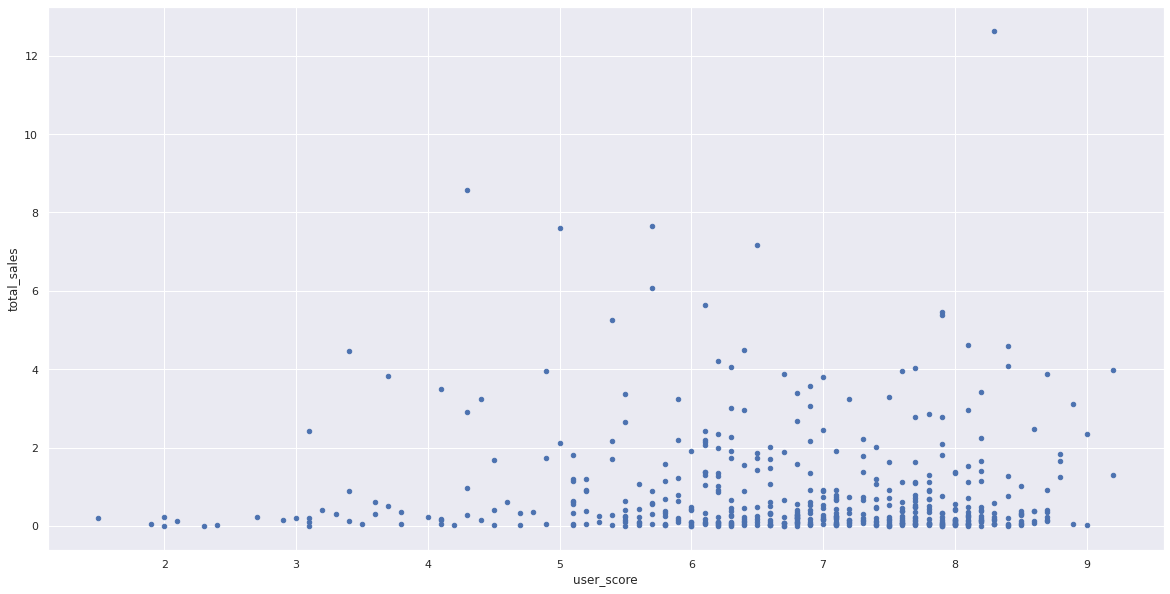

In [48]:
#видно что процент пропусков даже выше в этом периоде, нежели в первичных данных. Менять медианным данными нельзя, смысла
#ставить заглушку тоже не вижу. Поэтому будем работать с темми данными, какие имеем
data_top3_2013_2016 = data_top3_2013_2016.dropna(subset = ['critic_score'])
data_top3_2013_2016 = data_top3_2013_2016.dropna(subset = ['user_score'])
data_top3_2013_2016.user_score  = data_top3_2013_2016.user_score.astype('float')

#смотрим на корреляцию critic_score
data_top3_2013_2016.plot(kind='scatter', x='critic_score', y='total_sales')
print(data_top3_2013_2016['critic_score'].corr(data_top3_2013_2016['total_sales']))

#смотрим на корреляцию user_score
print(data_top3_2013_2016.plot( x='user_score', y='total_sales',kind='scatter'))
print(data_top3_2013_2016['user_score'].corr(data_top3_2013_2016['total_sales']))

Коэффиценты кореляции слабые. Оценик критиков практически никакакого влияние на продажи не оказывают. Коэффицент оценки пользователей равен 0.388, что можно расценивать как слабое влияние.

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют".

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.3392349287853147
AxesSubplot(0.125,0.125;0.775x0.755)
0.2729904366942444


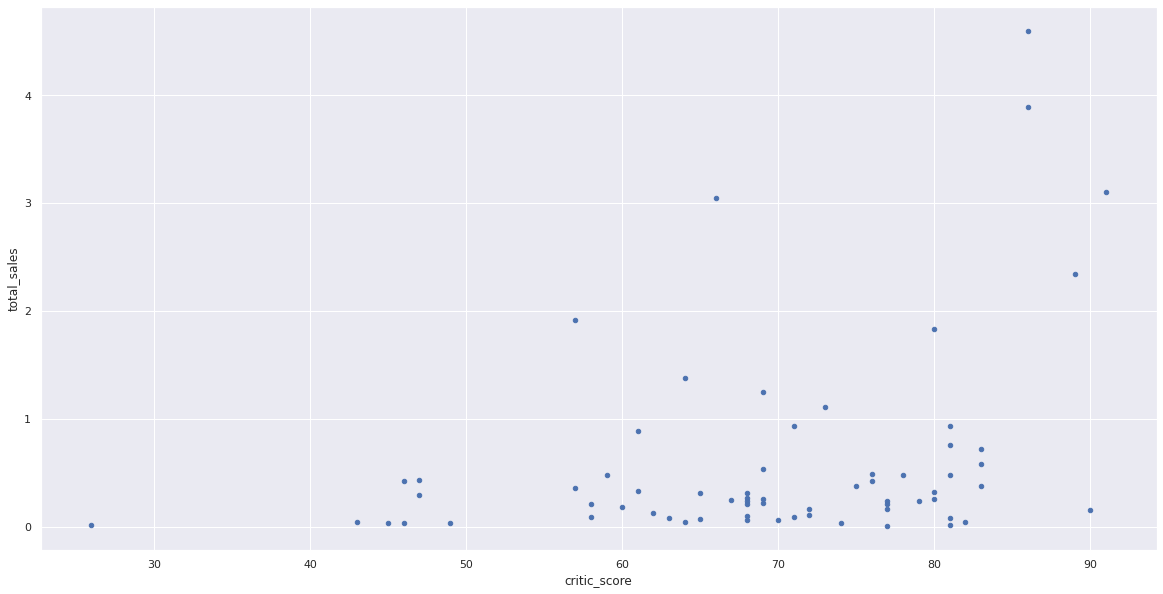

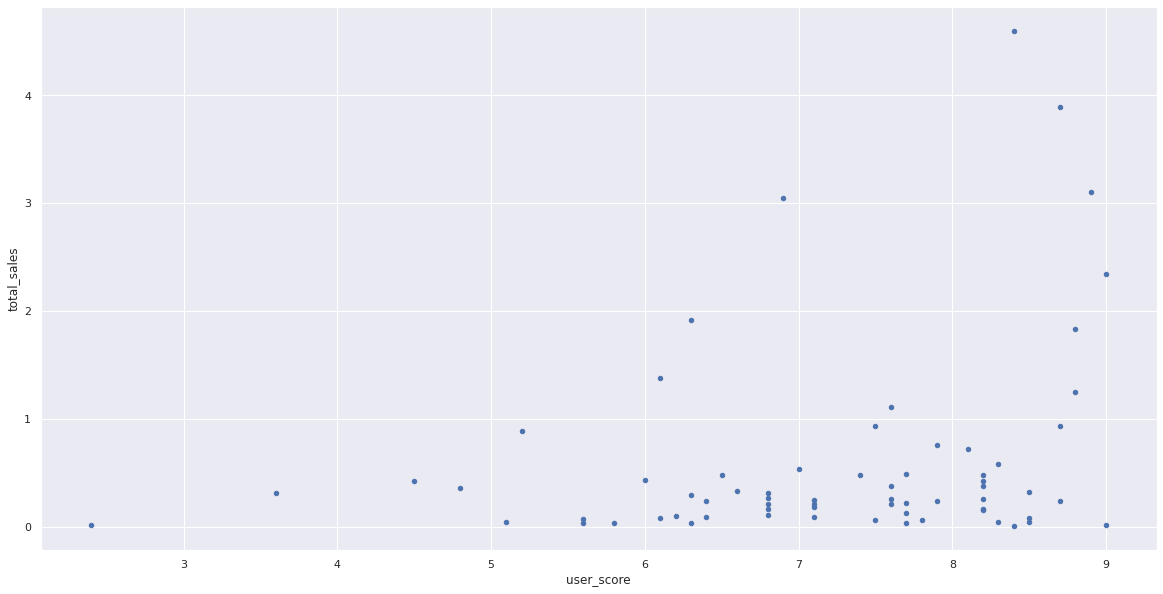

In [49]:
#Рассмотрю отдельно платформу 3DS, у которой не такие большие разбросы в показателях, как у других
three_ds =data_top3_2013_2016.query('platform == "3ds"')
three_ds.plot(kind='scatter', x='critic_score', y='total_sales')
print(three_ds['critic_score'].corr(three_ds['total_sales']))
print(three_ds.plot( x='user_score', y='total_sales',kind='scatter'))
print(three_ds['user_score'].corr(three_ds['total_sales']))

Кореляция по оценки критиков прямую, средне-слабую корреляцию с "цифрами" продаж. Возможно, у Nintendo как-то инчае продвигает свой продукт. Мне кажется этому можно посвятить отдельное иследование

## 3.5 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [50]:
#посмотрю сколько жанров вообще
data_2013_2016.genre.value_counts()
#получается самый популярный Action и самый нераспространенный Puzzle           

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

<AxesSubplot:xlabel='genre'>

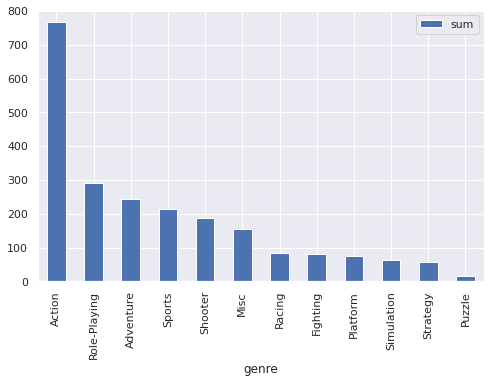

In [51]:
#оценим зависимость жанра от прибыли
data_genre=data_2013_2016.pivot_table(index ='genre', values='total_sales', aggfunc=('sum', 'count'))
data_genre.columns = ['sum','count']
data_genre.sort_values('sum', ascending = False).plot.bar(grid=True,figsize=(8,5),y='sum')
#Чем больше количество игр, тем выше прибыль

<AxesSubplot:xlabel='genre'>

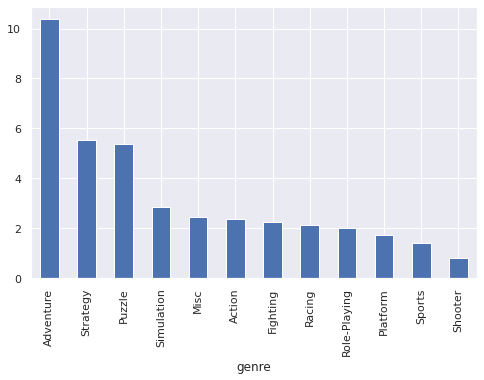

In [52]:
#А какое КПД в жанре?
data_genre_kpd = data_genre['sum']/data_genre['count']
data_genre_kpd.sort_values(ascending = False).plot.bar(grid=True,figsize=(8,5),y='sum')

Делаю вывод, что самый популярный на рынке жанр ЭКШН, однако самый результативный с точки зрения прибыли ПРИКЛЮЧЕНИЕ, СТРАТЕГИЯ и даже ПАЗЛЫ.

<AxesSubplot:xlabel='genre'>

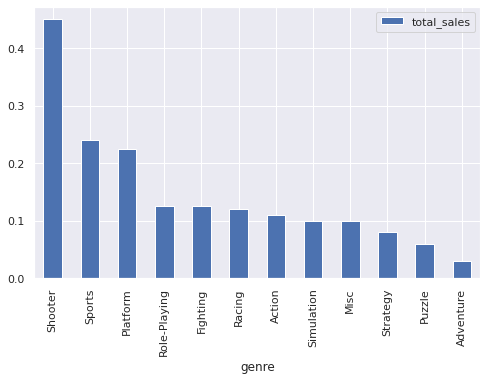

In [53]:
#строю гистрограмму медианного значения по жанрам
(
data_2013_2016.pivot_table(index ='genre', values='total_sales', aggfunc='median').
sort_values('total_sales', ascending = False).
plot.bar(grid=True,figsize=(8,5),y='total_sales')
)

Медианной значение выставляет свой порядок первенства жанров, в котором лидирующее место занимают шутеры, на 2 и 3 месте с небольшой разницей спор и платформа соответсвенно. Получается самые прибыльный жанр, да еще и с таким отрывом-это шутер. 

# Шаг 4. Составьте портрет пользователя каждого региона

**4.1 Определяю топ 5 платформ в разных регионах**

<AxesSubplot:xlabel='platform'>

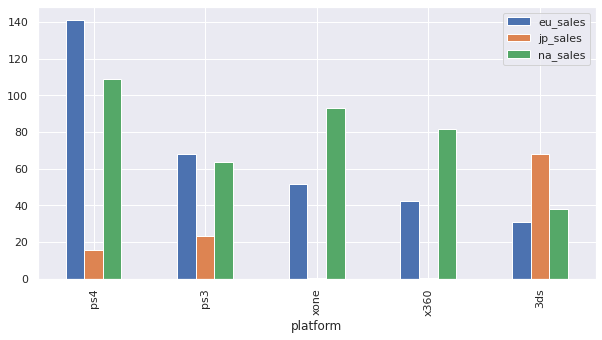

In [54]:
#топ-5 я уже считал ранее, поэтому воспльзуюсь переменной data_top5_2013_2016
(
data_top5_2013_2016.
pivot_table(index = 'platform', values=('na_sales','eu_sales','jp_sales'), aggfunc='sum').
sort_values(by='eu_sales', ascending=False).
plot.bar(figsize=(10,5))
)

Первое на что обращаю внимание, так на полное отсутвие продаж x360 и Xone на японском рынке, где лидером становиться продук японского рынка Нинтендо. В Европе с большим отровым занимает пальму пренвенства PS4, далее более старая модель того же производителя PS3 и замыкает 3-ку лидерсва Xone. В Северное Америке лидером выступает PS4, с небольшим отставание Xone и с таким же небольши отставание X360 занимает 3-е место. 

<AxesSubplot:xlabel='genre'>

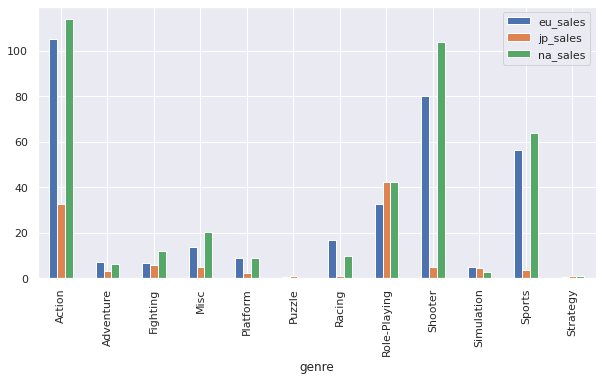

In [55]:
(
data_top5_2013_2016.
pivot_table(index = 'genre', values=('na_sales','eu_sales','jp_sales'), aggfunc='sum').
plot.bar(figsize=(10,5))
)


Японцы и тут отличились. Самые популярные жарны ролевые игры и экшены. В Европе и Северноей Америке Экшн, Шутер и спорт. Разницу в показания японцев могу объяснить в первую очередь культурным контрастом. Т.к. они чаще пользуются 3DS, а это портативная консоль, то становиться понятны различия в жанровых предпочтениях.

**4.2 Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [56]:
#cмотрим на значения которые есть в этой колонке и видим, что 977 строк не имею рейтинга, а это очень большая часть датасета
data_2013_2016['rating'].value_counts(dropna=False)

NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [57]:
#посмотрим на датафрем состоящий из пропуска в рейтинге
data_2013_2016[data_2013_2016['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
72,minecraft,x360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
87,star wars battlefront (2015),ps4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [58]:
#обращаю внимание что пропуски так же и в 2-ух соседних колонках, возможно есть взаимосвязь
data_2013_2016[data_2013_2016['rating'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             977 non-null    object 
 1   platform         977 non-null    object 
 2   year_of_release  977 non-null    Int64  
 3   genre            977 non-null    object 
 4   na_sales         977 non-null    float64
 5   eu_sales         977 non-null    float64
 6   jp_sales         977 non-null    float64
 7   other_sales      977 non-null    float64
 8   critic_score     37 non-null     float64
 9   user_score       42 non-null     float64
 10  rating           0 non-null      object 
 11  total_sales      977 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 100.2+ KB


In [59]:
#делаем заглушку, что бы проанализировать пропуски
data_2013_2016.rating = data_2013_2016.rating.fillna('pass')


/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
data_2013_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,pass,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,pass,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,pass,0.01
16707,aiyoku no eustia,psv,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,pass,0.01
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,pass,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,pass,0.01


<AxesSubplot:xlabel='rating'>

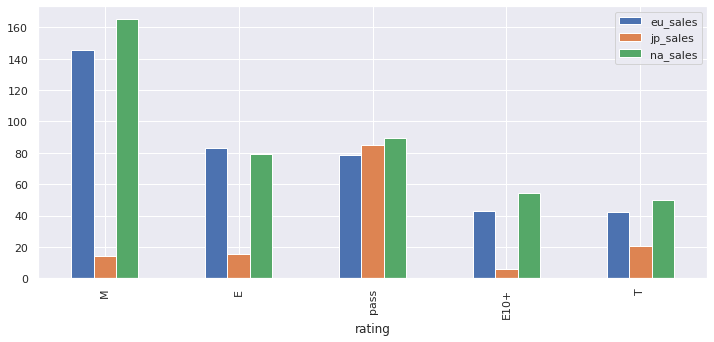

In [61]:
(
data_2013_2016.
pivot_table(index = 'rating', values=('na_sales','eu_sales','jp_sales'), aggfunc='sum').
sort_values(by='eu_sales', ascending=False).
plot.bar(figsize=(12,5))
)

## Шаг 5. Проверьте гипотезы

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [62]:
#настало время удалить пропуски в рейтингах, т.к. иначе расчет гипотезы будет не возможен
data_clean = data_2013_2016.dropna(subset = ['critic_score'])
data_clean = data_2013_2016.dropna(subset = ['user_score'])

#создаю переменные для сокращения записей
platform_x_one = data_2013_2016.query('platform == "XOne"')['user_score']
platform_pc = data_2013_2016.query('platform == "PC"')['user_score']

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [63]:
alpha = 0.05

results = st.ttest_ind(
    platform_x_one,
    platform_pc,
    equal_var=False 
)

print('p-значение:',results.pvalue )

if results.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**Вывод:** не принимаем нулевую гипотезу, p-значение меньше значения alpha, средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [64]:
#это же можно подтвердить следующими данными
print(platform_x_one.mean())
print(platform_pc.mean())

nan
nan


Различия есть, но небольшие. Возможно, в каком-то из срезов они будут одинаковыми.

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные**

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [65]:

results = st.ttest_ind(
    data_clean.query('genre == "Action"')['user_score'],
    data_clean.query('genre == "Sports"')['user_score']
)

alpha = 0.05 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [66]:
#проверим в ручном режиме
print(data_clean.query('genre == "Action"')['user_score'].mean())
print(data_clean.query('genre == "Sports"')['user_score'].mean())

6.837532133676092
5.238124999999999


**Вывод:** Можно увтерждать что, средние пользовательские рейтинги жанров Action и Sports одинаковые

# Шаг 6. Общий вывод

Данные об играх имеются с 1980 года, но данных до 1994 очень мало, что объясняется развитием технологий. 
Даже в 90-ых, когда выпуск игра не был так серийным как после 2000, все равно это был рынок с колосальными оборотами.
Несмотря на рост количества игр на всех платформах, популярность игровых платформ идет на спад. 

Средняя жизни платформы в районе 10 лет, что объясняется технологическим прогрессом. 

С 2013 по 2016 году в лидерах остаются PS4, Xone для Европы и Северной Америке и 3DS в Японии. За тот же период в процессе анализа данных был выявлен самый успешный с точки зрения прибыли жанр Шутеры, однако если в 2017 году идти покорять японский рынок, надо учесть, что из-за популярности 3DS в данном регионе, там самый успешным считается жанр Ролевые игры. Так же не забывать про различия в рейтинговых агенствах в разных регионах, т.к. 
анализ показал, что оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Все эти нюансы надо учитывать. 


Из полученных данных, по моему мнению рецептом успеха будет являться выпуск игры в жанре шутер, с рейтингом М-для взрослых, на платформе PS4 или Xone. Это касается рынков Европы и Северной Америке. В Японии нужно изучить отдельно их местное рейтинговое агенствах. Пока понятно, что туда лучше заходить с платформой 3DS и жанром ролевый игры



